<a href="https://colab.research.google.com/github/PUNNYA-P-GAUR/Machine-Learning/blob/main/LogR_vs_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,
                  columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 30)

In [ ]:
df.isnull().sum().sum()


0

In [ ]:
X = df
y = pd.Series(cancer.target)

In [ ]:

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

Accuracy: 0.93
Precision: 0.94
Recall: 0.94
F-Score: 0.94

Confusion Matrix


Text(33.0, 0.5, 'True')

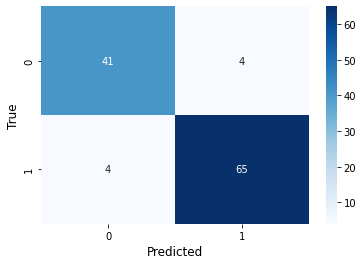

In [ ]:
# Initialize a logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=2500,
                                   random_state=42)

# Train (fit) the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test) # Predictions
y_true = y_test # True values

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred,
                                                               average='binary')
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("F-Score:", np.round(fscore, 2))

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
from keras.models import Sequential
ANN_model = Sequential()

In [ ]:
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
ANN_model.add(InputLayer(input_shape=(30, )))
# No hidden layers
ANN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
ANN_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = ANN_model.fit(X_train, y_train, 
                        epochs=10, batch_size=32,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/10
12/12 [==============================] - 2s 54ms/step - loss: 24.7308 - accuracy: 0.5879 - val_loss: 1.7880 - val_accuracy: 0.8462
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 4.5136 - accuracy: 0.7198 - val_loss: 1.6975 - val_accuracy: 0.7253
Epoch 3/10
12/12 [==============================] - 0s 10ms/step - loss: 1.6419 - accuracy: 0.8214 - val_loss: 1.9460 - val_accuracy: 0.7363
Epoch 4/10
12/12 [==============================] - 0s 11ms/step - loss: 1.1331 - accuracy: 0.8736 - val_loss: 0.8584 - val_accuracy: 0.8352
Epoch 5/10
12/12 [==============================] - 0s 15ms/step - loss: 0.9712 - accuracy: 0.8874 - val_loss: 0.7733 - val_accuracy: 0.8462
Epoch 6/10
12/12 [==============================] - 0s 10ms/step - loss: 0.8510 - accuracy: 0.8929 - val_loss: 0.7355 - val_accuracy: 0.8462
Epoch 7/10
12/12 [==============================] - 0s 9ms/step - loss: 0.7863 - accuracy: 0.8984 - val_loss: 0.4950 - val_accuracy: 0.8791
Epoch 8/10
12

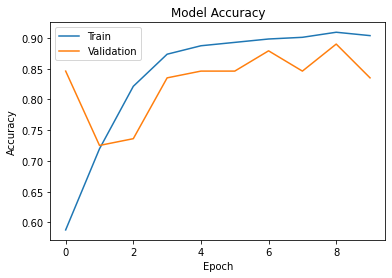

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

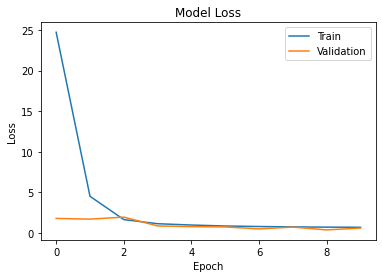

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [ ]:
test_loss, test_acc = ANN_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 1.3597 - accuracy: 0.8772
Test loss: 1.3596868515014648
Test accuracy: 0.8771929740905762
